In [1]:
# Importing necessary libraries and packages
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV

In [2]:
# Load the dataset
df = load_breast_cancer()
X = df.data
y = df.target

In [3]:
# Split the data into training set and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [4]:
# Implementing the model
svm_clf = Pipeline([
    ("Scaler", StandardScaler()),
    ("svm_clf", SVC( kernel='poly', degree=3, coef0=0.5, C=4))
])

In [5]:
# Fitting the model
svm_clf.fit(X_train, y_train)

Pipeline(steps=[('Scaler', StandardScaler()),
                ('svm_clf', SVC(C=4, coef0=0.5, kernel='poly'))])

In [6]:
# Making predictions
y_pred = svm_clf.predict(X_test)
y_pred

array([1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1])

In [7]:
# Evaluating the model using accuracy score
print("accuracy:",accuracy_score(y_test, y_pred))

accuracy: 0.9766081871345029


In [8]:
# Testing on cross validation folds
from sklearn.model_selection import cross_val_score, cross_val_predict
svm_cv = cross_val_score(svm_clf, X_train, y_train, cv=4)
svm_cv

array([0.99      , 0.98      , 0.98989899, 0.94949495])

In [9]:
# Calculating the average accuracy score
np.mean(svm_cv)

0.9773484848484848

In [10]:
# Define the parameter grid
param_grid = {
    'svm_clf__C': [0.1, 1, 10, 100],
    'svm_clf__kernel': ['linear', 'rbf', 'poly'],
    'svm_clf__degree': [2, 3, 4],
    'svm_clf__gamma': ['scale', 'auto', 0.1, 1],
    'svm_clf__coef0': [0.0, 0.1, 0.5]
}

In [11]:
# Create a GridSearchCV object
grid_search = GridSearchCV(svm_clf, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

In [12]:
# Fit the GridSearchCV
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('Scaler', StandardScaler()),
                                       ('svm_clf',
                                        SVC(C=4, coef0=0.5, kernel='poly'))]),
             n_jobs=-1,
             param_grid={'svm_clf__C': [0.1, 1, 10, 100],
                         'svm_clf__coef0': [0.0, 0.1, 0.5],
                         'svm_clf__degree': [2, 3, 4],
                         'svm_clf__gamma': ['scale', 'auto', 0.1, 1],
                         'svm_clf__kernel': ['linear', 'rbf', 'poly']},
             scoring='accuracy')

In [13]:
# Print the best parameters and score
print("Best parameters:", grid_search.best_params_)
print("Best cross-validation score:", grid_search.best_score_)

Best parameters: {'svm_clf__C': 1, 'svm_clf__coef0': 0.5, 'svm_clf__degree': 2, 'svm_clf__gamma': 'scale', 'svm_clf__kernel': 'poly'}
Best cross-validation score: 0.9748417721518987


In [14]:
# Use the best estimator for predictions
best_svm_clf = grid_search.best_estimator_
y_pred = best_svm_clf.predict(X_test)

In [15]:
# Evaluate the model
print("Test set accuracy:", accuracy_score(y_test, y_pred))
print("Test set precision:", precision_score(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
print("Test set confusion matrix:", cm)
print("Test set classification report:", classification_report(y_test, y_pred))

Test set accuracy: 0.9883040935672515
Test set precision: 0.9818181818181818
Test set confusion matrix: [[ 61   2]
 [  0 108]]
Test set classification report:               precision    recall  f1-score   support

           0       1.00      0.97      0.98        63
           1       0.98      1.00      0.99       108

    accuracy                           0.99       171
   macro avg       0.99      0.98      0.99       171
weighted avg       0.99      0.99      0.99       171



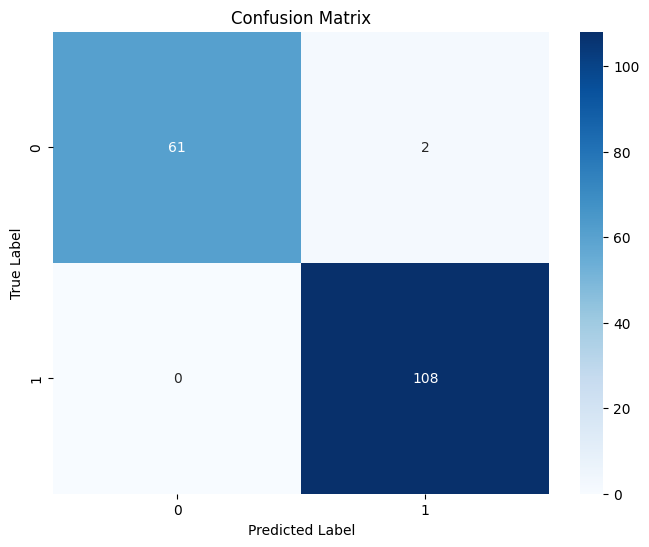

In [16]:
# Optionally, you can visualize the confusion matrix
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

In [17]:
# Testing on cross validation folds
from sklearn.model_selection import cross_val_score, cross_val_predict
svm_cv = cross_val_score(svm_clf, X_train, y_train, cv=4)
svm_cv

array([0.99      , 0.98      , 0.98989899, 0.94949495])

In [18]:
# Calculating the average accuracy score
np.mean(svm_cv)

0.9773484848484848

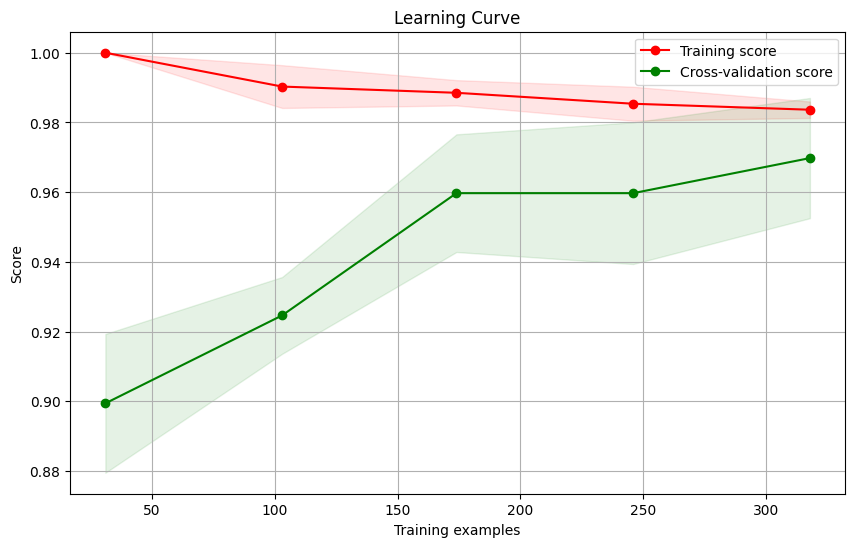

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

# Define the function to plot the learning curve
def plot_learning_curve(estimator, X, y, cv=None, n_jobs=None, train_sizes=np.linspace(0.1, 1.0, 5)):
    plt.figure(figsize=(10, 6))
    plt.title("Learning Curve")
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, scoring='accuracy'
    )
    
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    
    plt.grid()
    
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
    
    plt.legend(loc="best")
    return plt

# Plot the learning curve for the SVM model
plot_learning_curve(best_svm_clf, X_train, y_train, cv=5, n_jobs=-1)
plt.show()

In [20]:
# Implementing Decision tree classifier model
dt_clf = DecisionTreeClassifier(max_depth=2, max_leaf_nodes=3, min_samples_leaf=4)
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2, max_leaf_nodes=3, min_samples_leaf=4)

In [21]:
# Making predictions on test set
y_pred = dt_clf.predict(X_test)
y_pred

array([1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1])

In [22]:
print(accuracy_score(y_test, y_pred))

0.9064327485380117


In [23]:
# Define parameter grid
param_grid = {
    'max_depth': [1, 2, 3, 4, 6, 8],
    'max_leaf_nodes': [2, 3, 4, 5, 6, 7, 8, 9, 10],
    'min_samples_leaf': [1, 2, 3, 4, 5],
}

In [24]:
# Create a Grid search object
grid_search1 = GridSearchCV(dt_clf, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search1.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=DecisionTreeClassifier(max_depth=2, max_leaf_nodes=3,
                                              min_samples_leaf=4),
             n_jobs=-1,
             param_grid={'max_depth': [1, 2, 3, 4, 6, 8],
                         'max_leaf_nodes': [2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'min_samples_leaf': [1, 2, 3, 4, 5]},
             scoring='accuracy')

In [25]:
# Print the best parameters and score
print("Best parameters:", grid_search1.best_params_)
print("Best cross-validation score:", grid_search1.best_score_)

Best parameters: {'max_depth': 6, 'max_leaf_nodes': 8, 'min_samples_leaf': 4}
Best cross-validation score: 0.9347151898734177


In [26]:
# Use the best estimator for predictions
best_dt_clf = grid_search1.best_estimator_
y_pred = best_dt_clf.predict(X_test)

In [27]:
# Evaluate the model
print("Test set accuracy:", accuracy_score(y_test, y_pred))
print("Test set precision:", precision_score(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
print("Test set confusion matrix:", cm)
print("Test set classification report:", classification_report(y_test, y_pred))

Test set accuracy: 0.9707602339181286
Test set precision: 0.9813084112149533
Test set confusion matrix: [[ 61   2]
 [  3 105]]
Test set classification report:               precision    recall  f1-score   support

           0       0.95      0.97      0.96        63
           1       0.98      0.97      0.98       108

    accuracy                           0.97       171
   macro avg       0.97      0.97      0.97       171
weighted avg       0.97      0.97      0.97       171



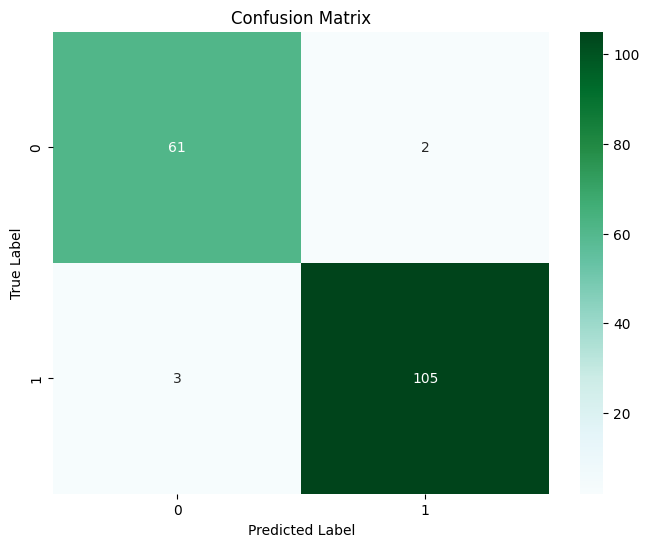

In [28]:
# Visualizing the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='BuGn')
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

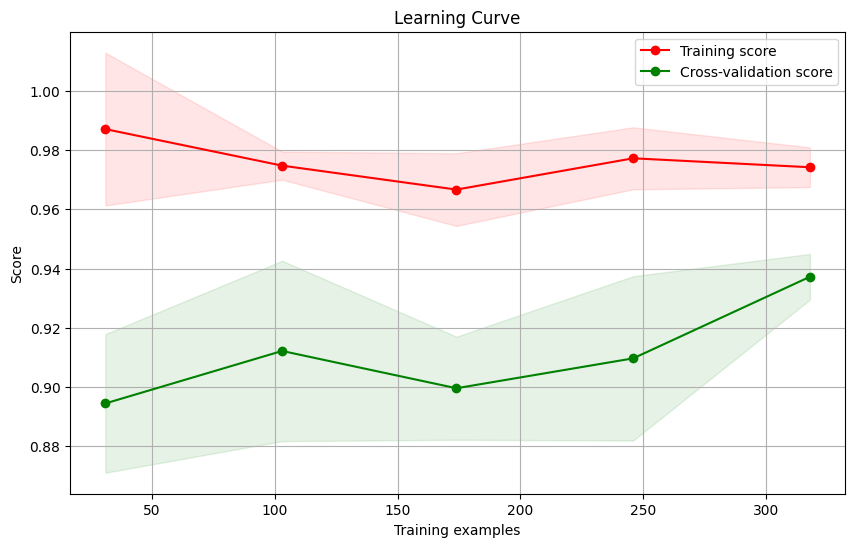

In [29]:
# Define the function to plot the learning curve
def plot_learning_curve(estimator, X, y, cv=None, n_jobs=None, train_sizes=np.linspace(0.1, 1.0, 5)):
    plt.figure(figsize=(10, 6))
    plt.title("Learning Curve")
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, scoring='accuracy'
    )
    
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    
    plt.grid()
    
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
    
    plt.legend(loc="best")
    return plt

# Plot the learning curve for the Decision tree model
plot_learning_curve(best_dt_clf, X_train, y_train, cv=5, n_jobs=-1)
plt.show()

In [30]:
# Checking the validation score
dt_cv = cross_val_score(best_dt_clf, X_train, y_train, cv=5)
dt_cv

array([0.9375    , 0.9125    , 0.925     , 0.94936709, 0.92405063])

In [31]:
# Claculating the average accuracy score
np.mean(dt_cv)

0.9296835443037974

In [32]:
# Initializing Random forest classifier model
rf_clf = RandomForestClassifier(n_estimators=100, max_depth= 10, max_samples=2, min_samples_leaf=2)

In [33]:
# Defining hyperparameters for grid search
param_grid = {
    'n_estimators': [10, 50, 100, 150, 200],
    'max_depth': [None, 10, 20,30],
    'max_samples': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None]
}

In [34]:
# Performing Grid search
grid_search2 = GridSearchCV(rf_clf, param_grid, cv=5, scoring = 'accuracy', n_jobs=-1)
grid_search2.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(max_depth=10, max_samples=2,
                                              min_samples_leaf=2),
             n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30],
                         'max_features': ['sqrt', 'log2', None],
                         'max_samples': [2, 5, 10],
                         'min_samples_leaf': [1, 2, 4],
                         'n_estimators': [10, 50, 100, 150, 200]},
             scoring='accuracy')

In [35]:
# Print the best parameters and score
print("Best parameters:", grid_search2.best_params_)
print("Best cross-validation score:", grid_search2.best_score_)

Best parameters: {'max_depth': 10, 'max_features': None, 'max_samples': 10, 'min_samples_leaf': 1, 'n_estimators': 50}
Best cross-validation score: 0.9497784810126582


In [36]:
# Get the best model
best_rf_clf = grid_search2.best_estimator_
y_pred = best_rf_clf.predict(X_test)

In [37]:
# Evaluate the model
print("Test set accuracy:", accuracy_score(y_test, y_pred))
print("Test set precision:", precision_score(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
print("Test set confusion matrix:", cm)
print("Test set classification report:", classification_report(y_test, y_pred))

Test set accuracy: 0.9707602339181286
Test set precision: 0.963963963963964
Test set confusion matrix: [[ 59   4]
 [  1 107]]
Test set classification report:               precision    recall  f1-score   support

           0       0.98      0.94      0.96        63
           1       0.96      0.99      0.98       108

    accuracy                           0.97       171
   macro avg       0.97      0.96      0.97       171
weighted avg       0.97      0.97      0.97       171



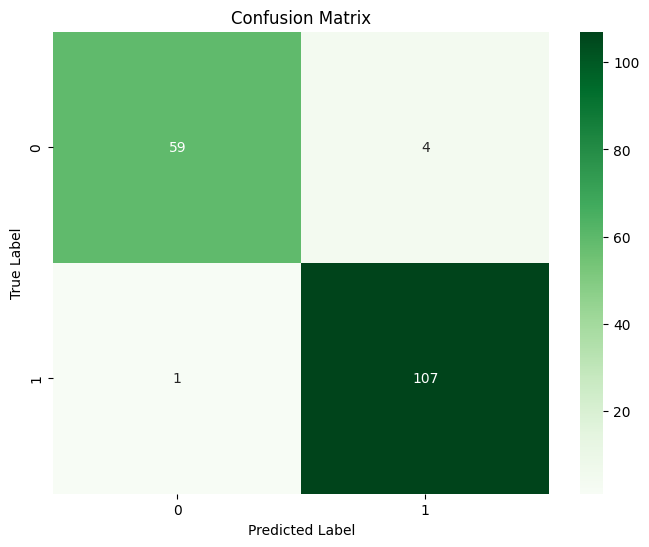

In [38]:
# Visualizing the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens')
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

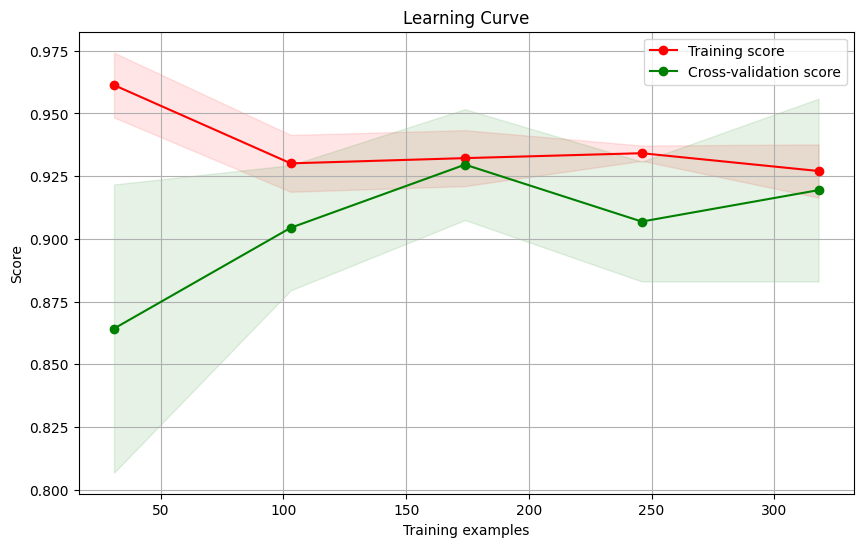

In [39]:
# Define the function to plot the learning curve
def plot_learning_curve(estimator, X, y, cv=None, n_jobs=None, train_sizes=np.linspace(0.1, 1.0, 5)):
    plt.figure(figsize=(10, 6))
    plt.title("Learning Curve")
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, scoring='accuracy'
    )
    
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    
    plt.grid()
    
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
    
    plt.legend(loc="best")
    return plt

# Plot the learning curve for the Decision tree model
plot_learning_curve(best_rf_clf, X_train, y_train, cv=5, n_jobs=-1)
plt.show()

In [40]:
# Checking for the cross validation score on 5 folds
rf_clf_cv = cross_val_score(best_rf_clf, X_train, y_train, cv=5)
rf_clf_cv

array([0.925     , 0.925     , 0.9375    , 0.88607595, 0.93670886])

In [41]:
# Calculating the average of the accuracy score
np.mean(rf_clf_cv)

0.9220569620253164

In [42]:
# Saving the svm model 
import pickle

with open('C:/Users/USER/svm_model.pkl', 'wb') as f:
    pickle.dump(best_svm_clf, f)

In [43]:
with open('svm_model.pkl', 'rb') as f:
    model = pickle.load(f)


In [44]:
with open(r'C:\Users\USER\svm_model.pkl', 'wb') as f:
    pickle.dump(model, f)